In [17]:
# 6.2 a

In [18]:
from keras import layers
from keras import models
import pandas as pd
from keras.datasets import mnist
from keras.utils import to_categorical
import os, shutil
from keras.datasets import cifar10

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [21]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [22]:
train_images.shape

(50000, 32, 32, 3)

In [23]:
test_images.shape

(10000, 32, 32, 3)

In [24]:
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 17s 20ms/step - loss: 1.8259 - accuracy: 0.3284 - val_loss: 1.4673 - val_accuracy: 0.4502
Epoch 2/10
782/782 [==============================] - 15s 19ms/step - loss: 1.2324 - accuracy: 0.5658 - val_loss: 1.1595 - val_accuracy: 0.5952
Epoch 3/10
782/782 [==============================] - 14s 18ms/step - loss: 1.0124 - accuracy: 0.6451 - val_loss: 1.0624 - val_accuracy: 0.6273
Epoch 4/10
782/782 [==============================] - 14s 18ms/step - loss: 0.8634 - accuracy: 0.6997 - val_loss: 0.9014 - val_accuracy: 0.6883
Epoch 5/10
782/782 [==============================] - 14s 18ms/step - loss: 0.7470 - accuracy: 0.7389 - val_loss: 0.9797 - val_accuracy: 0.6830
Epoch 6/10
782/782 [==============================] - 14s 18ms/step - loss: 0.6587 - accuracy: 0.7694 - val_loss: 0.9836 - val_accuracy: 0.6744
Epoch 7/10
782/782 [==============================] - 14s 18ms/step - loss: 0.5844 - accuracy: 0.7954 - val_loss: 1.2486 - val_accuracy:

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 5ms/step - loss: 0.9941 - accuracy: 0.6949


0.6948999762535095

In [16]:
import matplotlib.pyplot as plt

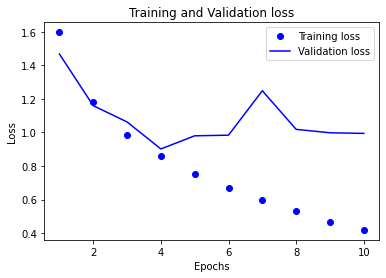

In [25]:
history_dict = history.history
loss_values = history_dict['loss']
accuracy = history_dict['accuracy']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

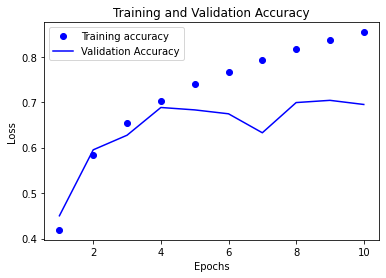

In [26]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [27]:
# 6.2 b

In [28]:
from keras.preprocessing.image import ImageDataGenerator

In [29]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True)
train_gen = train_datagen.flow(train_images, train_labels, batch_size = 64)


history = model.fit(train_gen, epochs = 10, validation_data = (test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 34s 42ms/step - loss: 1.8997 - accuracy: 0.3004 - val_loss: 1.2708 - val_accuracy: 0.5364
Epoch 2/10
782/782 [==============================] - 33s 43ms/step - loss: 1.3470 - accuracy: 0.5165 - val_loss: 1.0659 - val_accuracy: 0.6247
Epoch 3/10
782/782 [==============================] - 33s 42ms/step - loss: 1.1585 - accuracy: 0.5892 - val_loss: 0.9994 - val_accuracy: 0.6554
Epoch 4/10
782/782 [==============================] - 33s 42ms/step - loss: 1.0424 - accuracy: 0.6363 - val_loss: 0.9074 - val_accuracy: 0.6821
Epoch 5/10
782/782 [==============================] - 34s 43ms/step - loss: 0.9654 - accuracy: 0.6612 - val_loss: 0.8878 - val_accuracy: 0.6901
Epoch 6/10
782/782 [==============================] - 33s 42ms/step - loss: 0.9218 - accuracy: 0.6800 - val_loss: 0.8044 - val_accuracy: 0.7210
Epoch 7/10
782/782 [==============================] - 33s 42ms/step - loss: 0.8724 - accuracy: 0.6971 - val_loss: 0.8030 - val_accuracy:

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 5ms/step - loss: 0.7809 - accuracy: 0.7369


0.7368999719619751

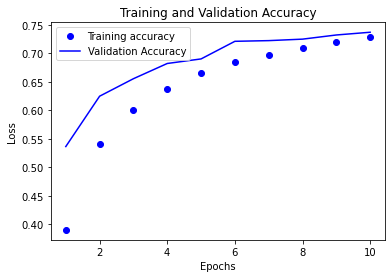

In [31]:
history_dict = history.history
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()